Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:
1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

# DATA PREPARATION

## LOADING DATASETS

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [221]:
Variable_Definitions = pd.read_csv('VariableDefinitions.csv')
Variable_Definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [222]:
Financial_Data = pd.read_csv('Financial Dataset - 1.csv')
Financial_Data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [223]:
Financial_Data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [224]:
Financial_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [225]:
Financial_Data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [226]:
Financial_Data.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_898,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [227]:
# Reanaming Columns to match the Variable Definitions Dataset
Financial_Data.columns = ['country', 'year', 'uniqueid', 'has_bank_account', 'location_type', 
                          'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 
                          'relationship_with_head', 'marital_status', 'education_level', 'job_type']
Financial_Data.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [228]:
# Checking for duplicated data
Financial_Data.duplicated().sum()

0

In [229]:
# Checking for Null values
Financial_Data.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_bank_account          36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [230]:
# Previewing Null values so as to know what to do with them.

Nulls = Financial_Data[Financial_Data.isnull().any(axis=1)]
Nulls

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
436,Kenya,2018,uniqueid_437,No,Rural,Yes,2.0,NaN,NaN,Head of Household,Widowed,Primary education,Farming and Fishing
437,Kenya,2018,uniqueid_438,No,Rural,Yes,1.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Farming and Fishing
438,Kenya,2018,uniqueid_439,Yes,Urban,Yes,2.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Formally employed Government
439,Kenya,2018,uniqueid_440,No,Rural,Yes,10.0,NaN,NaN,Spouse,Married/Living together,Primary education,Farming and Fishing
7281,Rwanda,2016,uniqueid_1214,No,Rural,Yes,4.0,NaN,Male,Head of Household,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income


## DEFINING THE QUESTION

### a) Specifying the Question

Predict which individuals are most likely to have or use a bank account, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for success
 
Finding the most deterministic factors for financial inclusion.

### c) Understanding the Context

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The goal is to determine which factors most contribute to owning bank accounts, hence contribute to financial inclusion.

### d) Recording the Experimental Design

1. Loading the Datasets (done Above)
2. Data Preparation (done Above)
3. Investigating the Dataset (done Above)
4. Data Cleaning
5. Exploratory Data Analysis (Univariate, Bivariate and Multivariate)
6. Answering the Question
7. Conclusions
8. Recommendations

### e) Data Relevance

This will be discussed from d) 6 to d) 8, after the analysis is complete

# DATA CLEANING

In [231]:
# Determining the no. of records in our dataset

print('The number of rows is ' + str(Financial_Data.shape[0]) + ' and columns are ' +str(Financial_Data.shape[1]))

The number of rows is 23524 and columns are 13


In [232]:
print('The records with Null Values has ' + str(Nulls.shape[0]) + ' rows and ' +str(Financial_Data.shape[1]) + ' columns')

The records with Null Values has 181 rows and 13 columns


In [233]:
Nulls_Percentage = (181 / 23524)*100
Nulls_Percentage

# The number of records with Nulls is less than 0.8 % of the data and can therefore be neglected during analysis.

0.7694269682026866

In [234]:
# Dropping Nulls

Fin_No_Null = Financial_Data.dropna(axis=0)
Fin_No_Null.shape

(23343, 13)

# Exploratory Data Analysis (EDA)


## UNIVARIATE

## a) Numerical

In [235]:
Fin_No_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_bank_account        23343 non-null  object 
 4   location_type           23343 non-null  object 
 5   cellphone_access        23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   age_of_respondent       23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   relationship_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  education_level         23343 non-null  object 
 12  job_type                23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


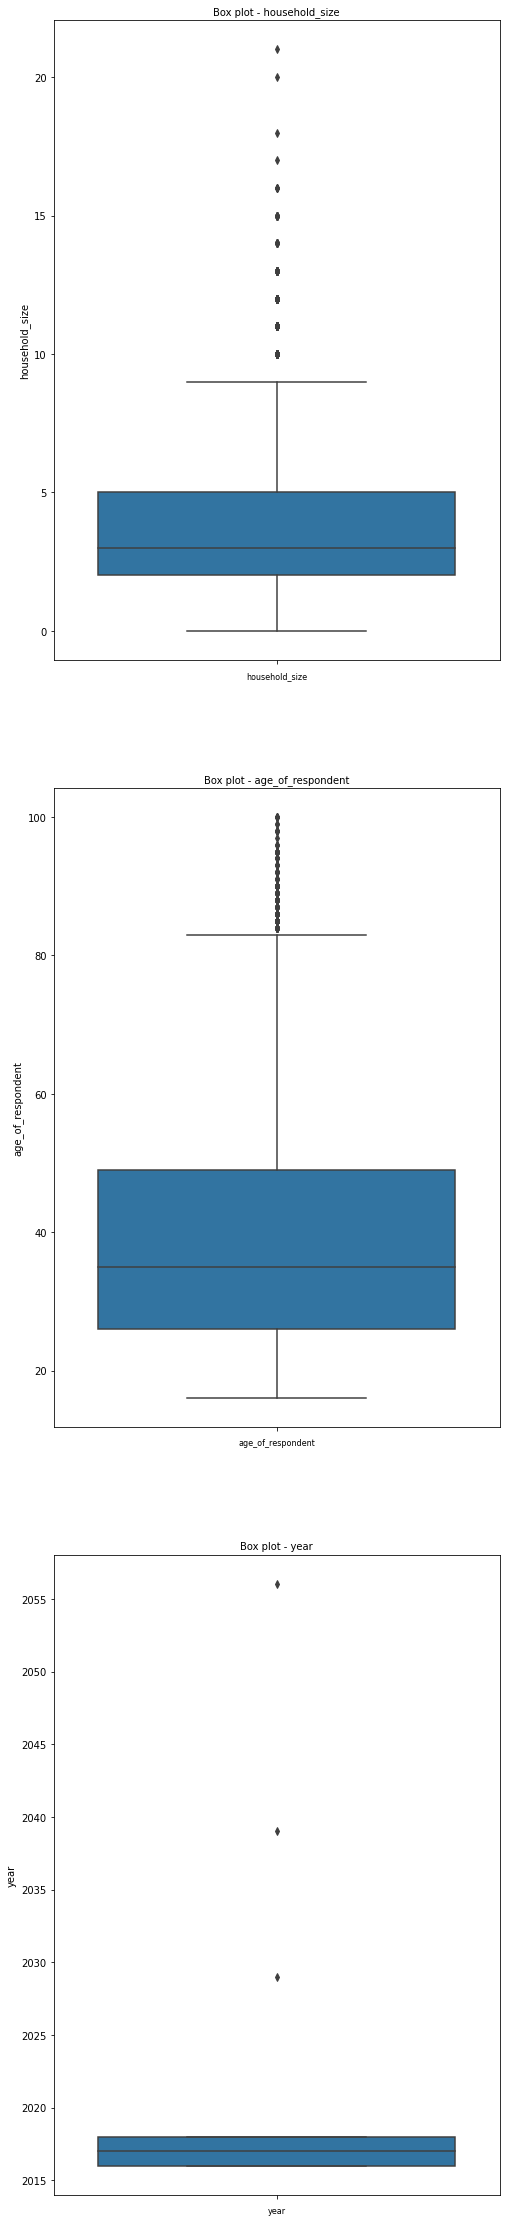

In [236]:
col_names = ['household_size','age_of_respondent', 'year']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = Fin_No_Null[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# from the boxplot below we can see there are a couple of outliers

In [237]:
# Preview of Year outliers
Fin_No_Null[Fin_No_Null.year > 2018]

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [238]:
# Since the data was taken in 2018, there can't be data from years after that, unless they are predictions.
# We will remove the 3 rows shown above

Fin_No_Null = Fin_No_Null[Fin_No_Null.year < 2019]
Fin_No_Null[Fin_No_Null.year > 2018]

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [239]:
# Checking for Anomalies

Q1_household_size = Fin_No_Null['household_size'].quantile(.25)
Q3_household_size = Fin_No_Null['household_size'].quantile(.75)

IQR_household_size = Q3_household_size - Q1_household_size

print('IQR households ' + str(IQR_household_size))

Q1_age_of_respondent = Fin_No_Null['age_of_respondent'].quantile(.25)
Q3_age_of_respondent = Fin_No_Null['age_of_respondent'].quantile(.75)

IQR_age_of_respondent = Q3_age_of_respondent - Q1_age_of_respondent

print('IQR age ' + str(IQR_age_of_respondent))

lower_bound_household_size = Q1_household_size - (1.5*IQR_household_size)
upper_bound_household_size = Q3_household_size + (1.5 * IQR_household_size)

print('lower_bound_household_size ' + str(lower_bound_household_size))
print('upper_bound_household_size ' + str(upper_bound_household_size))

lower_bound_age_of_respondent = Q1_age_of_respondent - (1.5*IQR_age_of_respondent)
upper_bound_age_of_respondent = Q3_age_of_respondent + (1.5 * IQR_age_of_respondent)

print('lower_bound_age_of_respondent ' + str(lower_bound_age_of_respondent))
print('upper_bound_age_of_respondent ' + str(upper_bound_age_of_respondent))

IQR households 3.0
IQR age 23.0
lower_bound_household_size -2.5
upper_bound_household_size 9.5
lower_bound_age_of_respondent -8.5
upper_bound_age_of_respondent 83.5


In [240]:
# Dealing with outliers and anomalies

Fin_No_Null = Fin_No_Null[Fin_No_Null.household_size <= upper_bound_household_size]
Fin_No_Null

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [241]:
Fin_No_Null = Fin_No_Null[Fin_No_Null.age_of_respondent < upper_bound_age_of_respondent]
Fin_No_Null

# In both cases, the lower bounds from the IQR were ignored, since they were negatives,
# which have no implications in household or age columns. 

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


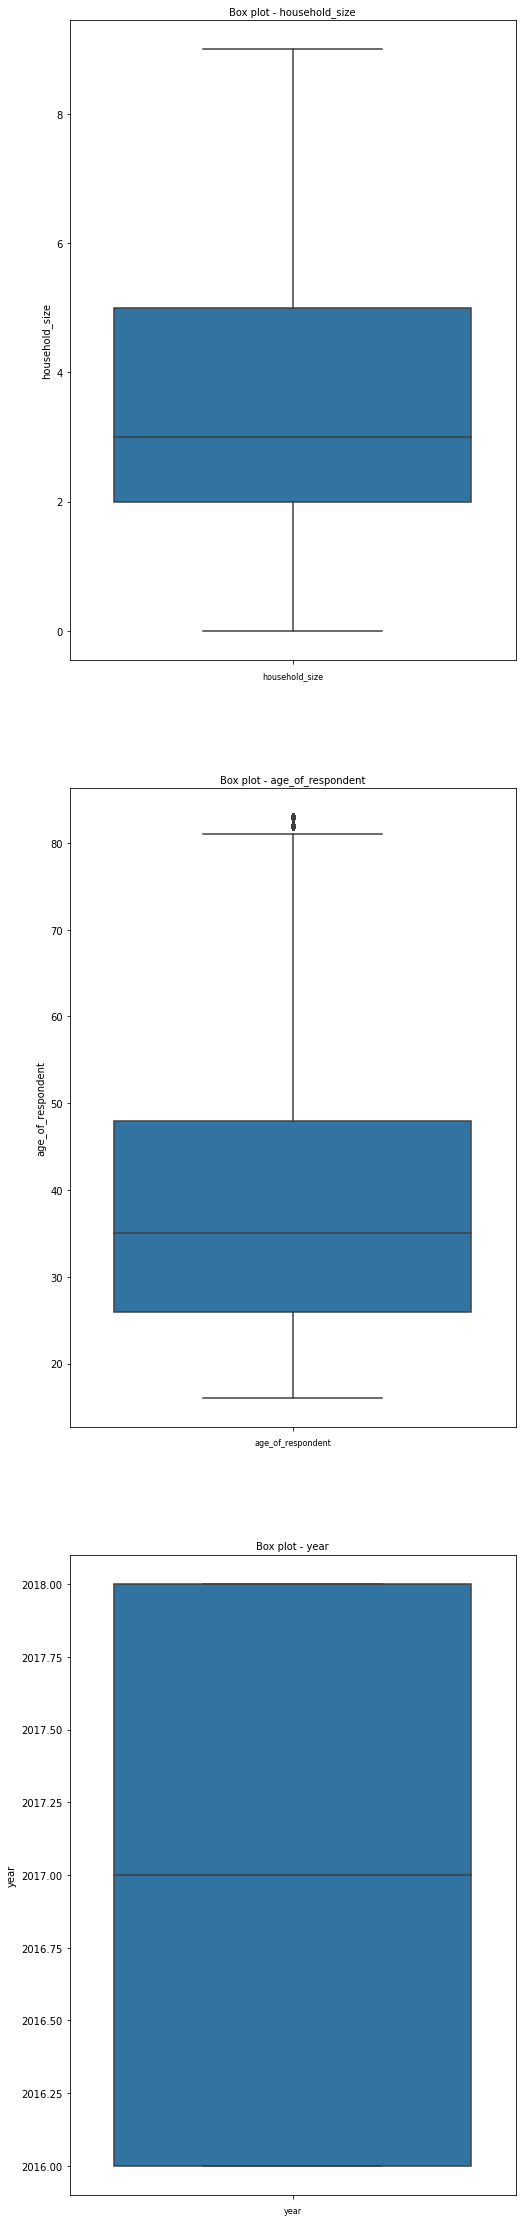

In [242]:
# Checking the new boxplots

col_names = ['household_size','age_of_respondent', 'year']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = Fin_No_Null[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# The anomalies in the household size and year columns were dealt with.
# The outliers in the age column could only be minimised. 

## b) Categorical

In [243]:
Fin_No_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   has_bank_account        22725 non-null  object 
 4   location_type           22725 non-null  object 
 5   cellphone_access        22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   age_of_respondent       22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   relationship_with_head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  education_level         22725 non-null  object 
 12  job_type                22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


Text(0.5, 1.0, 'East African Country Records')

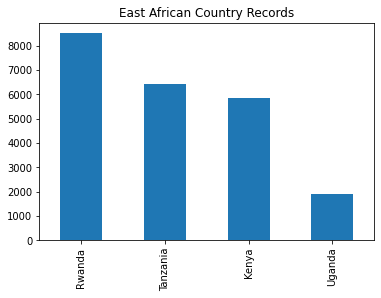

In [244]:
# Records from different countries

Fin_No_Null.country.value_counts().plot.bar()
plt.title('East African Country Records')

Text(0.5, 1.0, 'Bank Account Holders')

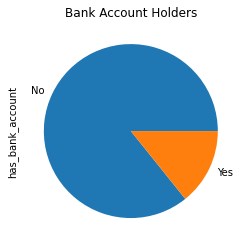

In [245]:
Fin_No_Null.has_bank_account.value_counts().plot(kind= 'pie')
plt.title('Bank Account Holders')

Text(0.5, 1.0, 'Location')

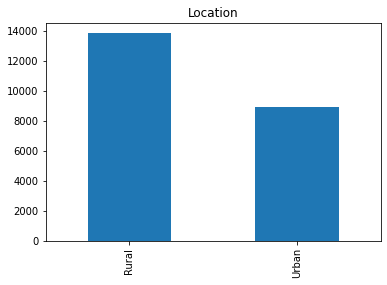

In [246]:
Fin_No_Null.location_type.value_counts().plot(kind= 'bar')
plt.title('Location')

# More people live in the rural areas than the urban areas

Text(0.5, 1.0, 'Cellphone Access')

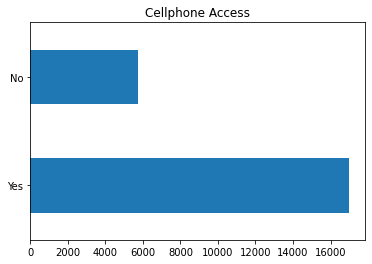

In [247]:
Fin_No_Null.cellphone_access.value_counts().plot(kind= 'barh')
plt.title('Cellphone Access')

# There's a large access to cellphone as was mentioned before.

Text(0.5, 1.0, 'Gender')

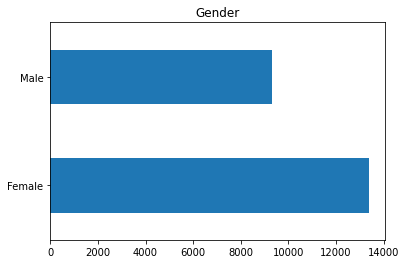

In [248]:
Fin_No_Null.gender_of_respondent.value_counts().plot(kind= 'barh')
plt.title('Gender')

#There are more females than males.

Text(0.5, 1.0, 'Household Relationships')

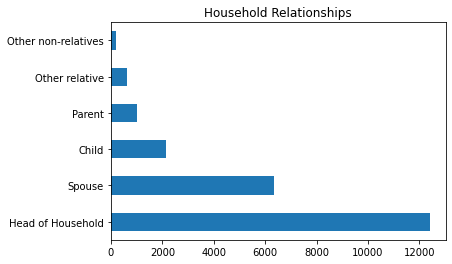

In [249]:
Fin_No_Null.relationship_with_head.value_counts().plot(kind= 'barh')
plt.title('Household Relationships')

# Most of the respondents were the heads of households, followed by their spouse.

Text(0.5, 1.0, 'Marital Status')

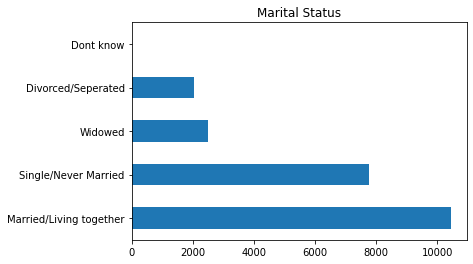

In [250]:
Fin_No_Null.marital_status.value_counts().plot(kind= 'barh')
plt.title('Marital Status')

# Most of the respondents were married, followed by singles.

Text(0.5, 1.0, 'Education Level')

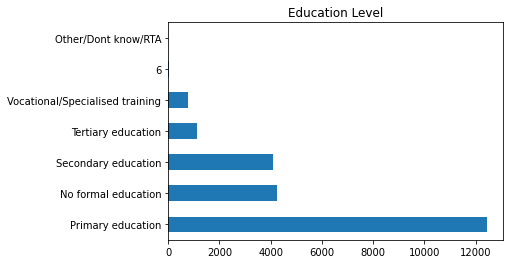

In [251]:
Fin_No_Null.education_level.value_counts().plot(kind= 'barh')
plt.title('Education Level')

# Most EA respondents only have a Primary education. '6' needs to be 
# investigated further.

Text(0.5, 1.0, 'Jobs')

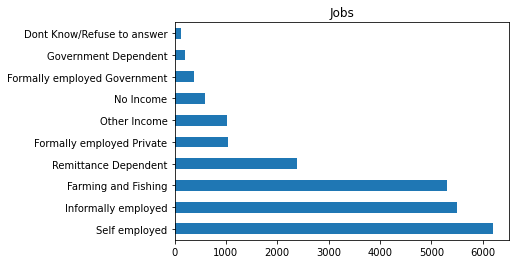

In [252]:
Fin_No_Null.job_type.value_counts().plot(kind= 'barh')
plt.title('Jobs')

# Most participants are Self employed, Informally employed or Farmers and Fisher(men/women)

## c) Summary Statistics

In [253]:
Fin_No_Null.describe()

,year,household_size,age_of_respondent
count,22725.000000,22725.000000,22725.000000
mean,2016.968185,3.579846,38.347987
std,0.846366,2.080542,15.806141
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


In [254]:
Fin_No_Null.describe(include= 'all')

# The Central Tendencies, Quantiles and Standard deviations are shown below

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,22725,22725.000000,22725,22725,22725,22725,22725.000000,22725.000000,22725,22725,22725,22725,22725
unique,4,NaN,8645,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_898,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8512,NaN,4,19490,13810,16985,NaN,NaN,13397,12402,10431,12443,6209
mean,NaN,2016.968185,NaN,NaN,NaN,NaN,3.579846,38.347987,NaN,NaN,NaN,NaN,NaN
std,NaN,0.846366,NaN,NaN,NaN,NaN,2.080542,15.806141,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,48.000000,NaN,NaN,NaN,NaN,NaN


In [255]:
print('The mode of year: '+str(Fin_No_Null.year.mode()))
print('The mode of household size: '+str(Fin_No_Null.household_size.mode()))
print('The mode of age: '+str(Fin_No_Null.age_of_respondent.mode()))

# The modes of the numeric fields are unimodal, indicating the data is sampled from one population i.e. East Africa.

The mode of year: 0    2016
dtype: int64
The mode of household size: 0    2.0
dtype: float64
The mode of age: 0    30.0
dtype: float64


In [256]:
# Ranges of numeric data

print('The range of year: ' +str(Fin_No_Null.year.max()- Fin_No_Null.year.min()))
print('The range of household size: ' +str(Fin_No_Null.household_size.max() - Fin_No_Null.household_size.min()))
print('The range of ages: ' +str(Fin_No_Null.age_of_respondent.max() - Fin_No_Null.age_of_respondent.min()))

# The range shows that the dataset has 3 years worth of data, 10 different numeric values for the household sizes and
# 68 different ages.

The range of year: 2
The range of household size: 9.0
The range of ages: 67.0


In [257]:
# Standard Deviation of Numeric Data

print('The standard deviation of year: '+str(Fin_No_Null.year.std()))
print('The standard deviation of household size: '+str(Fin_No_Null.household_size.std()))
print('The standard deviation of age: '+str(Fin_No_Null.age_of_respondent.std()))

# The standard deviations mirror the ranges, in that the values with more range show higher
# values of standard deviation, meaning the data is more spread out with increasing deviation.

The standard deviation of year: 0.8463657883520268
The standard deviation of household size: 2.080542136724138
The standard deviation of age: 15.806141256107674


In [258]:
# Variance of Numeric Data

print('The variance of year: '+str(Fin_No_Null.year.var()))
print('The variance of household size: '+str(Fin_No_Null.household_size.var()))
print('The variance of age: '+str(Fin_No_Null.age_of_respondent.var()))

# Similar to standard deviation above in that, The greater the variance, the greater the spread 
# in the data about the mean.

The variance of year: 0.7163350476927479
The variance of household size: 4.328655582684643
The variance of age: 249.83410140802906


In [259]:
# Quantiles of Numeric Data

print('The quantiles of year: \n'+str(Fin_No_Null.year.quantile([0.25,0.5,0.75])))
print('The quantiles of household size: \n'+str(Fin_No_Null.household_size.quantile([0.25,0.5,0.75])))
print('The quantiles of age: \n'+str(Fin_No_Null.age_of_respondent.quantile([0.25,0.5,0.75])))

# The quantiles indicate Q1(0.25) - point where 25% of the data is below or equal to (2016 for year, 2 for household size and 26 for age)
# Q2(0.5) - point where 50% of the data is below or equal to (2017 for year, 3 for household size and 35 for age). It is also the median.
# Q3(0.75) - point where 75% of the data is below or equal to (2018 for year, 5 for household size and 48 for age).

The quantiles of year: 
0.25    2016.0
0.50    2017.0
0.75    2018.0
Name: year, dtype: float64
The quantiles of household size: 
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
The quantiles of age: 
0.25    26.0
0.50    35.0
0.75    48.0
Name: age_of_respondent, dtype: float64


In [260]:
# Skewness of Numeric Data

print('The skewness of year: '+str(Fin_No_Null.year.skew()))
print('The skewness of household size: '+str(Fin_No_Null.household_size.skew()))
print('The skewness of age: '+str(Fin_No_Null.age_of_respondent.skew()))

# The positive values indicates that the tail of the data is right-skewed.
# The skew of year seems almost negligibe and could be symmetrical/non-skewed

The skewness of year: 0.06035122899784449
The skewness of household size: 0.6058745818063943
The skewness of age: 0.7402138281724044


In [261]:
# Kurtosis of Numeric Data

print('The kurtosis of year: '+str(Fin_No_Null.year.kurt()))
print('The kurtosis of household size: '+str(Fin_No_Null.household_size.kurt()))
print('The kurtosis of age: '+str(Fin_No_Null.age_of_respondent.kurt()))

# The data has negative kurtosis indicating that the distribution has lighter tails 
# and a flatter peak than the normal distribution. 

The kurtosis of year: -1.6014658084675666
The kurtosis of household size: -0.5055780598336774
The kurtosis of age: -0.23749387799691757


## d) Univariate Analysis Recommendation

The categorical columns e.g. relationship_with_head, marital_status, education_level and job_type can be converted to numbers by numeric encoding in order to further analyse them.

## BIVARIATE

## a) Numeric

In [262]:
Fin_No_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   has_bank_account        22725 non-null  object 
 4   location_type           22725 non-null  object 
 5   cellphone_access        22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   age_of_respondent       22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   relationship_with_head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  education_level         22725 non-null  object 
 12  job_type                22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


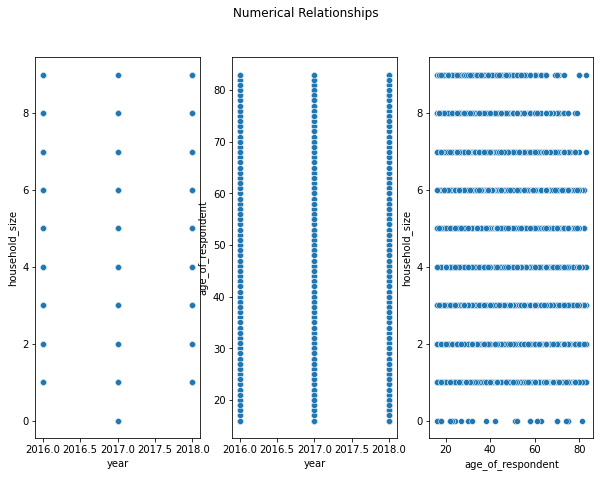

In [263]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 7))
fig.suptitle('Numerical Relationships')
sns.scatterplot(x= Fin_No_Null.year, y= Fin_No_Null.household_size, ax=ax1)
sns.scatterplot(x= Fin_No_Null.year, y= Fin_No_Null.age_of_respondent, ax=ax2)
sns.scatterplot(x=Fin_No_Null.age_of_respondent , y= Fin_No_Null.household_size, ax=ax3)
plt.show()

# There seems to be no correlation among any of the numeric columns

In [264]:
pearson_coeff = Fin_No_Null["household_size"].corr(Fin_No_Null["age_of_respondent"], method="pearson") 
pearson_coeff

# As suspected from the scatterplot above, the pearson correlation shows very weak negative correlation,
# Virtually, there's no correlation between household size and age of respondent.

-0.10620882169759871

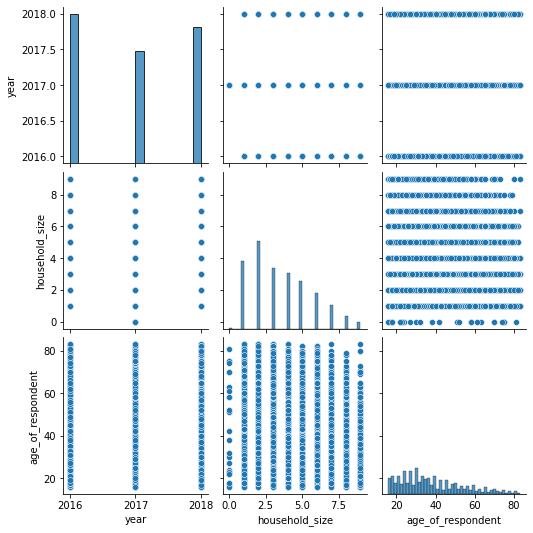

In [265]:
sns.pairplot(Fin_No_Null)
plt.show()
# This further confirms the lack of correlation

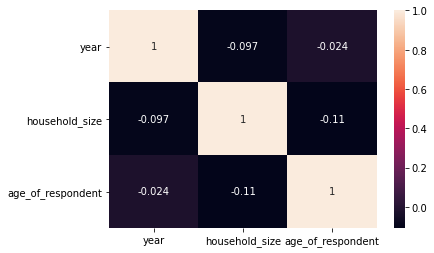

In [266]:
#The heatmap cements our lack of correlation analysis

sns.heatmap(Fin_No_Null.corr(),annot=True)
plt.show()

## b) Categorical

In [273]:
Fin_No_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   has_bank_account        22725 non-null  object 
 4   location_type           22725 non-null  object 
 5   cellphone_access        22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   age_of_respondent       22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   relationship_with_head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  education_level         22725 non-null  object 
 12  job_type                22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


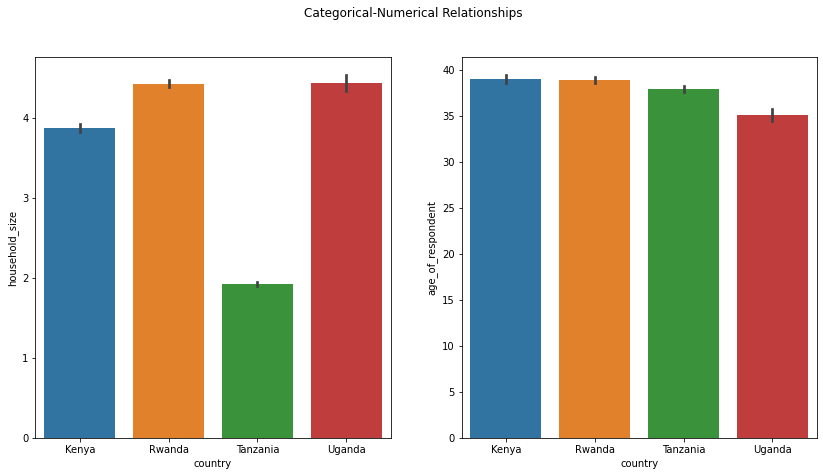

In [285]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.country, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.country, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Uganda and Rwanda had the highest household sizes, each ~4.5 people per house, while Tanzania had the least at ~2. 
# In terms of age, all countries had similar averages between 35 - 39 years.

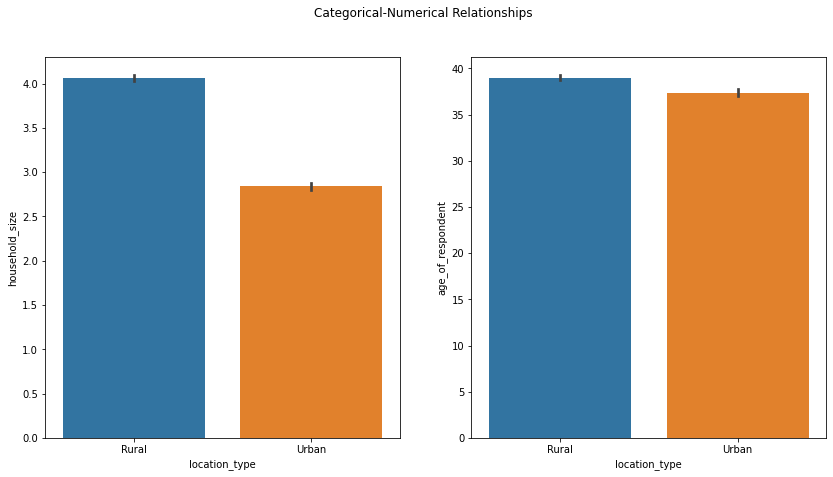

In [286]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.location_type, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.location_type, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Rural areas had an average of 4 people per house while urban areas had ~2.8. 
# The ages were also almost similar between 37 - 39 years.

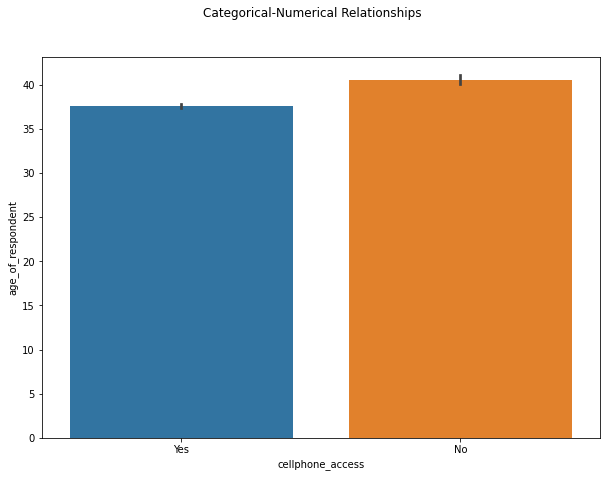

In [304]:
fig ,ax = plt.subplots(1, figsize=(10, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.cellphone_access, y= Fin_No_Null.age_of_respondent, ax=ax)
plt.show()

# The average age of respondents with cellphone access was 37.5 years, while those that did not have was 40 years.

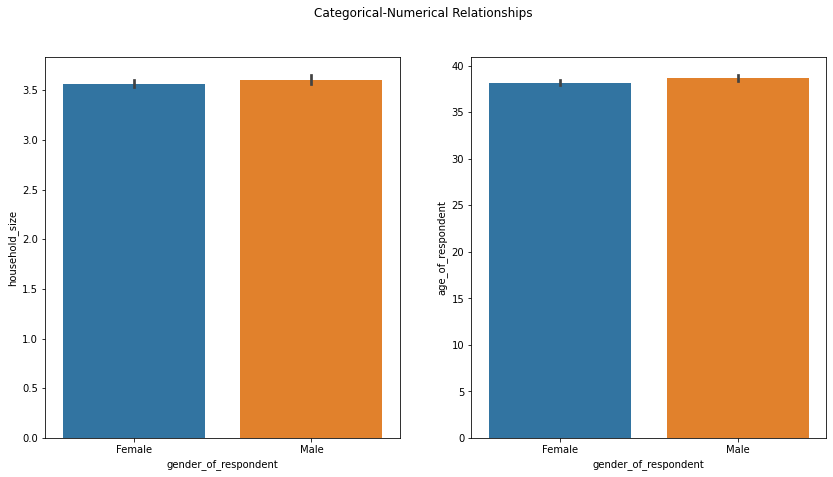

In [288]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.gender_of_respondent, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.gender_of_respondent, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Neither age nor household size was significantly different when compared to the gender.

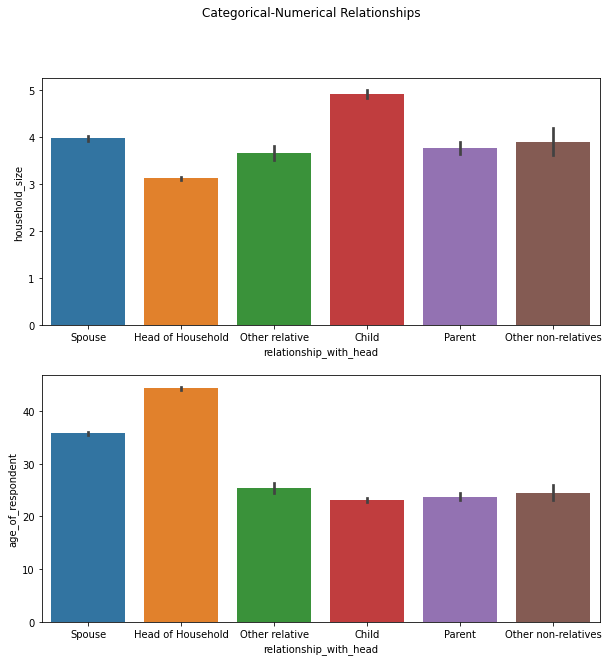

In [310]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10, 10))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.relationship_with_head, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.relationship_with_head, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Households with average of 3 members had most respondents being the Head of the household 
# whereas those with an average over 4 had children as the most respondents.
# Respondents with an average of over 40 years tended to be the heads of the house.

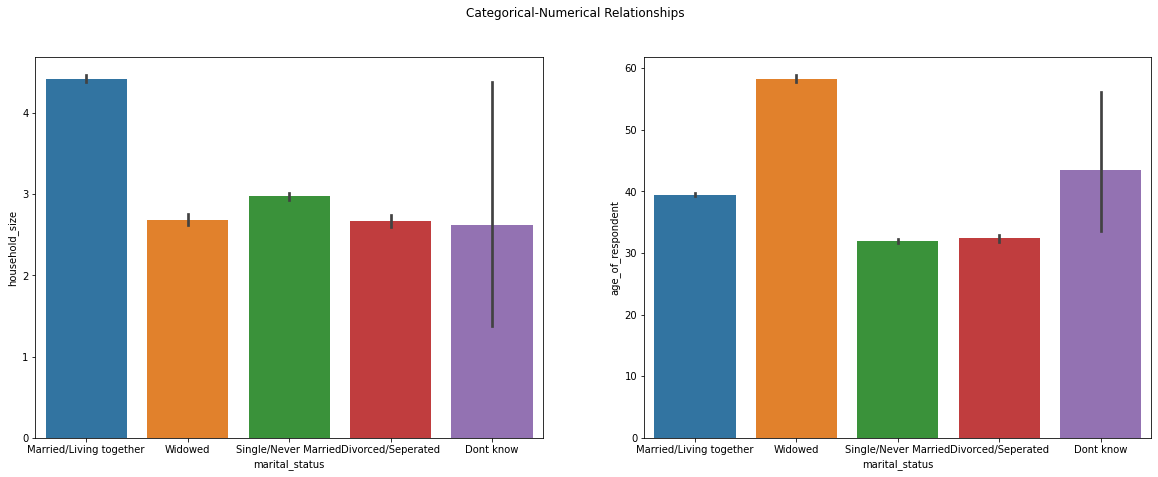

In [293]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.marital_status, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.marital_status, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Households with an average of over 4 people were largely dominated by married/living together couples.
# Households with average age approaching 60 were dominated by widowed people.

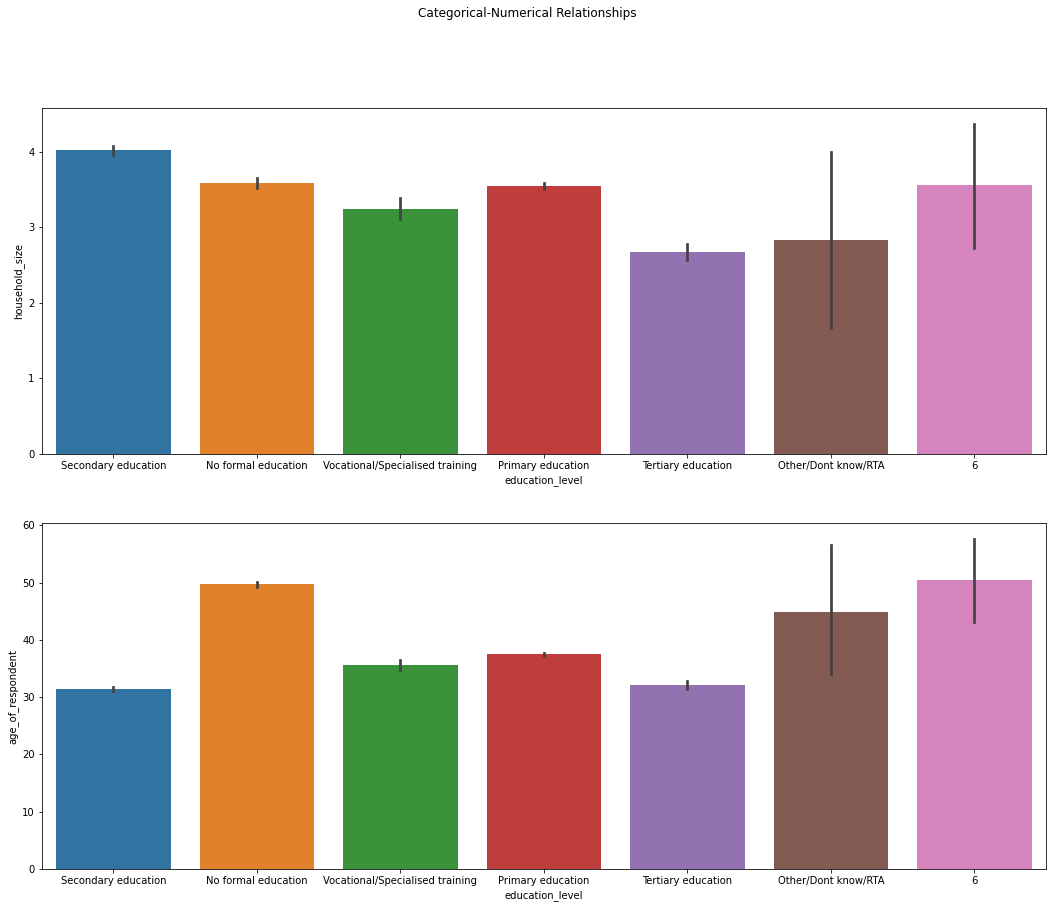

In [301]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(18, 14))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.education_level, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.education_level, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Households with 4 people were dominated by Secondary education recipients whereas people approaching 50 years largely have no formal education.

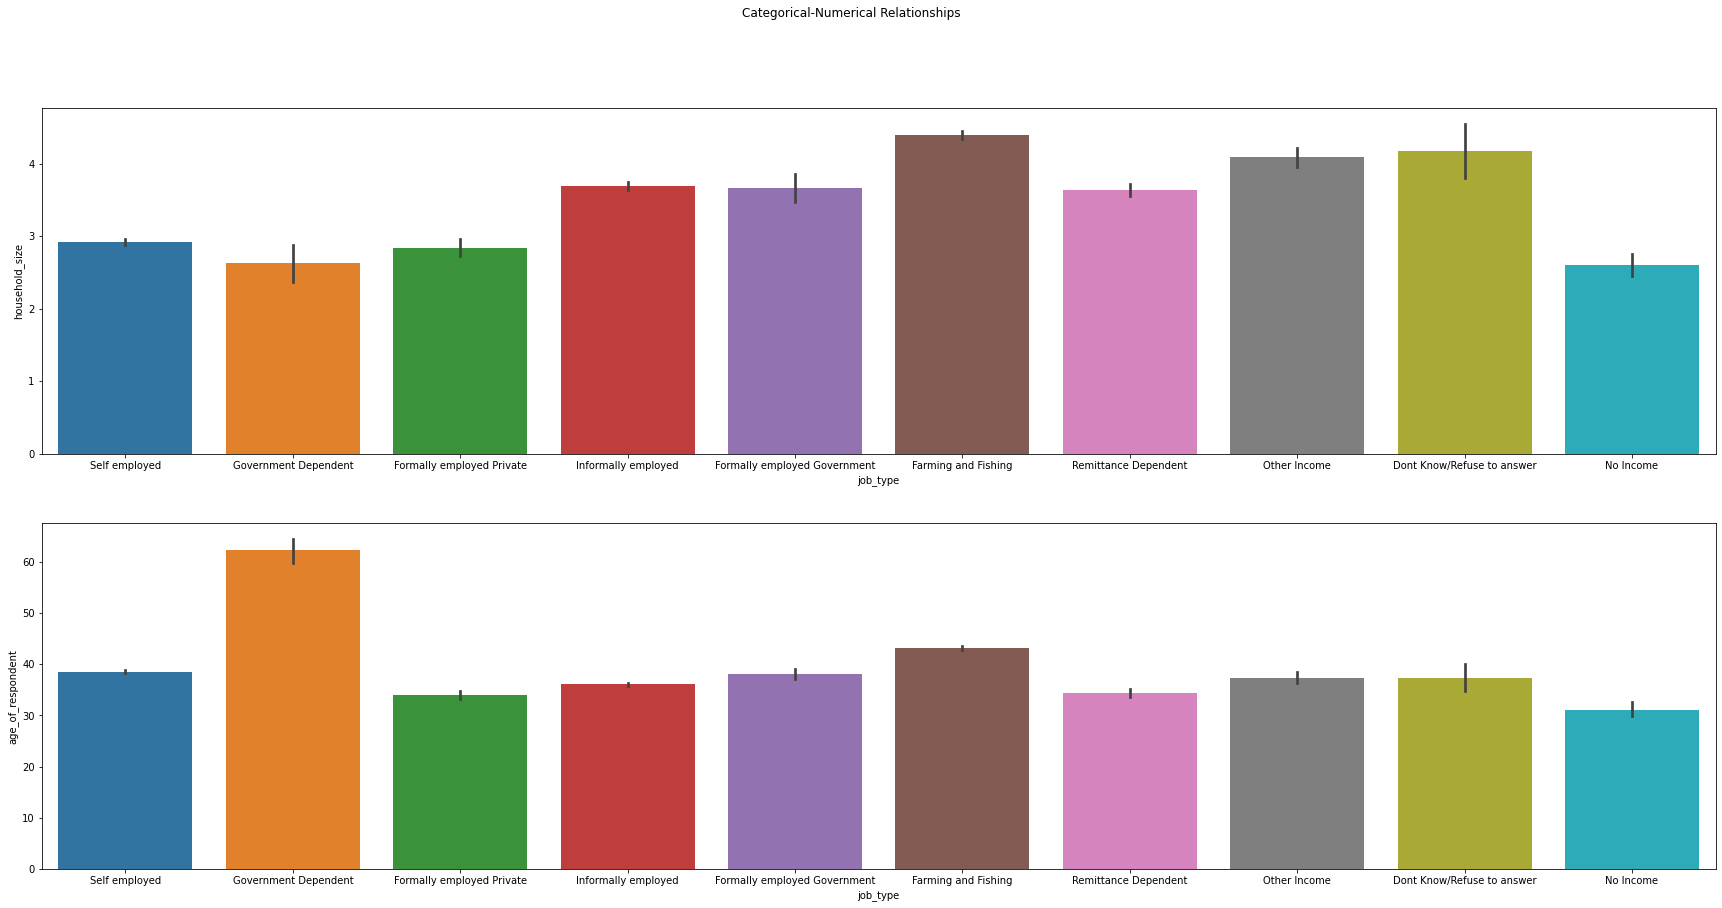

In [313]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(30, 14))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= Fin_No_Null.job_type, y= Fin_No_Null.household_size, ax=ax1)
sns.barplot(x= Fin_No_Null.job_type, y= Fin_No_Null.age_of_respondent, ax=ax2)
plt.show()

# Bigger households largely depended on farming and fishing.
# The elderly (60yrs) largely depended on the Government for their livelihood.

## c) Bivariate Analysis Recommendations

The data '6' in educational level does not have a proper reference, hence we can only assume that it means the level of education referred to is standard/grade 6. Another option is to ignore it, however as can be seen, there's a substatial amount of data that holds this value. Further research needs to be done to determine what this value actually represents.

Furthermore T-test cannot be conducted since the variance between the 2 numerical values isn’t homogenous.

## MULTIVARIATE

### a) PCA (Principal Component Analysis)

In [330]:
Fin_No_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 22725 non-null  object  
 1   year                    22725 non-null  int64   
 2   uniqueid                22725 non-null  object  
 3   has_bank_account        22725 non-null  object  
 4   location_type           22725 non-null  object  
 5   cellphone_access        22725 non-null  object  
 6   household_size          22725 non-null  float64 
 7   age_of_respondent       22725 non-null  float64 
 8   gender_of_respondent    22725 non-null  object  
 9   relationship_with_head  22725 non-null  object  
 10  marital_status          22725 non-null  object  
 11  education_level         22725 non-null  category
 12  job_type                22725 non-null  object  
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 2.9+ MB


In [332]:
# Data for label encoding

Financial_encoding = Fin_No_Null.copy(deep=True)
Financial_encoding['education_level'] = Financial_encoding['education_level'].astype('category')
Financial_encoding['job_type'] = Financial_encoding['job_type'].astype('category')
Financial_encoding['country'] = Financial_encoding['country'].astype('category')
Financial_encoding['location_type'] = Financial_encoding['location_type'].astype('category')
Financial_encoding['cellphone_access'] = Financial_encoding['cellphone_access'].astype('category')
Financial_encoding['gender_of_respondent'] = Financial_encoding['gender_of_respondent'].astype('category')
Financial_encoding['relationship_with_head'] = Financial_encoding['relationship_with_head'].astype('category')
Financial_encoding['marital_status'] = Financial_encoding['marital_status'].astype('category')
Financial_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 22725 non-null  category
 1   year                    22725 non-null  int64   
 2   uniqueid                22725 non-null  object  
 3   has_bank_account        22725 non-null  object  
 4   location_type           22725 non-null  category
 5   cellphone_access        22725 non-null  category
 6   household_size          22725 non-null  float64 
 7   age_of_respondent       22725 non-null  float64 
 8   gender_of_respondent    22725 non-null  category
 9   relationship_with_head  22725 non-null  category
 10  marital_status          22725 non-null  category
 11  education_level         22725 non-null  category
 12  job_type                22725 non-null  category
dtypes: category(8), float64(2), int64(1), object(2)
memory usage: 1.8+ MB


In [333]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

Financial_encoding['education_level'] = labelencoder.fit_transform(Financial_encoding['education_level'])
Financial_encoding['job_type'] = labelencoder.fit_transform(Financial_encoding['job_type'])
Financial_encoding['country'] = labelencoder.fit_transform(Financial_encoding['country'])
Financial_encoding['location_type'] = labelencoder.fit_transform(Financial_encoding['location_type'])
Financial_encoding['cellphone_access'] = labelencoder.fit_transform(Financial_encoding['cellphone_access'])
Financial_encoding['gender_of_respondent'] = labelencoder.fit_transform(Financial_encoding['gender_of_respondent'])
Financial_encoding['relationship_with_head'] = labelencoder.fit_transform(Financial_encoding['relationship_with_head'])
Financial_encoding['marital_status'] = labelencoder.fit_transform(Financial_encoding['marital_status'])
Financial_encoding.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5


In [341]:
x = Financial_encoding.drop(['has_bank_account', 'uniqueid'], axis= 1) # features
y = Financial_encoding['has_bank_account'] #target variable

In [342]:
# Splitting the data into train and test sets

from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [343]:
x_train.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
20265,2,2017,1,0,2.0,29.0,0,5,3,3,9
20845,2,2017,1,0,1.0,23.0,0,5,3,3,9
21432,3,2018,0,0,8.0,45.0,0,0,2,1,9
12659,1,2016,0,1,2.0,27.0,1,1,2,3,5
16087,2,2017,0,1,1.0,26.0,0,1,3,5,3


In [344]:
y_train.head()

# train sets have similar index

20265     No
20845     No
21432     No
12659     No
16087    Yes
Name: has_bank_account, dtype: object

In [345]:
x_test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
7808,1,2016,0,1,6.0,30.0,0,5,2,1,1
10042,1,2016,0,1,5.0,39.0,1,1,2,4,1
18864,2,2017,1,0,3.0,65.0,0,1,2,1,9
22049,3,2018,0,0,5.0,50.0,0,1,4,1,6
8447,1,2016,0,1,2.0,68.0,0,1,4,1,1


In [346]:
y_test.head()

# test sets have similar index 

7808     No
10042    No
18864    No
22049    No
8447     No
Name: has_bank_account, dtype: object

In [347]:
# Performing standard scalar normalization to normalize our feature set.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [349]:
# Applying PCA
# We did not specify the number of components in the constructor. 
# Hence, the features in Financial_encoding set will be returned for both the training and test sets.

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [350]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

# From below, we can see that the first 10 (neglecting the last principal component 
# gives us an accuracy of 96.19%)

array([0.1825506 , 0.1495114 , 0.14198433, 0.10227957, 0.087048  ,
       0.07485691, 0.06894082, 0.06022762, 0.0522532 , 0.04231575,
       0.0380318 ])

### Improving the PCA model

In [361]:
# Using 1 Principal Component

pca = PCA(n_components=1)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [362]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [363]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The Accuracy has dropped to 85.75 % when using one principal component

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [368]:
# Using 2 Principal Components

pca = PCA(n_components=2)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [369]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# There's no change in accuracy, therefore all features seem to be contributing to the results.

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


### b) LDA (Linear Discriminate Analysis)

In [370]:
x = Financial_encoding.drop(['has_bank_account', 'uniqueid'], axis= 1) # features
y = Financial_encoding['has_bank_account'] #target variable

In [371]:
# Split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [372]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [373]:
# Peforming LDA
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

In [374]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [375]:
# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# The accuracy with 1 LDA is higher than that with 1 PCA which had 85% accuracy.

[[3792  104]
 [ 468  181]]
Accuracy0.8741474147414742


# IMPLEMENTING THE SOLUTION

In [377]:
Bank_Account = Fin_No_Null[Fin_No_Null.has_bank_account == 'Yes']
Bank_Account.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [395]:
Bank_Account.country.value_counts()

# Kenyans have the most accounts

Kenya       1491
Rwanda       980
Tanzania     598
Uganda       166
Name: country, dtype: int64

In [397]:
Bank_Account.location_type.value_counts()

# Location doesn't matter

Urban    1620
Rural    1615
Name: location_type, dtype: int64

In [398]:
Bank_Account.cellphone_access.value_counts()

# Most have a cell-phone

Yes    3142
No       93
Name: cellphone_access, dtype: int64

In [399]:
Bank_Account.household_size.value_counts()

# Generally, households with less people have more banking access

1.0    667
2.0    621
3.0    501
4.0    469
5.0    410
6.0    268
7.0    177
8.0     85
9.0     36
0.0      1
Name: household_size, dtype: int64

In [400]:
Bank_Account.age_of_respondent.value_counts()

# Generally, people between 28 - 40 years old have more banking access

30.0    175
35.0    134
28.0    125
32.0    125
40.0    122
       ... 
77.0      6
16.0      5
82.0      5
81.0      3
83.0      2
Name: age_of_respondent, Length: 68, dtype: int64

In [401]:
Bank_Account.gender_of_respondent.value_counts()

# More males than feales have bank accounts

Male      1782
Female    1453
Name: gender_of_respondent, dtype: int64

In [402]:
Bank_Account.relationship_with_head.value_counts()

# The heads of households have more acces to accounts

Head of Household      2221
Spouse                  688
Child                   185
Other relative           64
Parent                   58
Other non-relatives      19
Name: relationship_with_head, dtype: int64

In [403]:
Bank_Account.marital_status.value_counts()

# Married/Living together people have more bank accounts

Married/Living together    1827
Single/Never Married        946
Widowed                     230
Divorced/Seperated          230
Dont know                     2
Name: marital_status, dtype: int64

In [404]:
Bank_Account.education_level.value_counts()

# People with some form of education have more acces to bank accounts

Primary education                  1061
Secondary education                 968
Tertiary education                  584
Vocational/Specialised training     450
No formal education                 161
Other/Dont know/RTA                   6
6                                     5
Name: education_level, dtype: int64

In [405]:
Bank_Account.job_type.value_counts()

# Type of job affects the banking access

Self employed                   835
Farming and Fishing             620
Formally employed Private       564
Informally employed             438
Formally employed Government    297
Remittance Dependent            230
Other Income                    183
Government Dependent             41
Dont Know/Refuse to answer       14
No Income                        13
Name: job_type, dtype: int64

In [406]:
Bank_Account.year.value_counts()

# As expected, as the years progress, the access to banking improves.

2018    1657
2016     980
2017     598
Name: year, dtype: int64

# CONCLUSION


Location doesn’t matter (rural or urban) and could be the feature that we neglect in the prediction model. All the other factors affect the access to banking.

# RECOMMENDATION

For better analysis, more numerical values should be included in the data collection phase. Ideally, the categorical responses should be serialised in numbers so as to enable efficient analysis that will enable correlations to be realised better.

